### 라이브러리 설치

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


In [ ]:
# test shape : 28 x 28 크기를 가진 데이터가 6만개

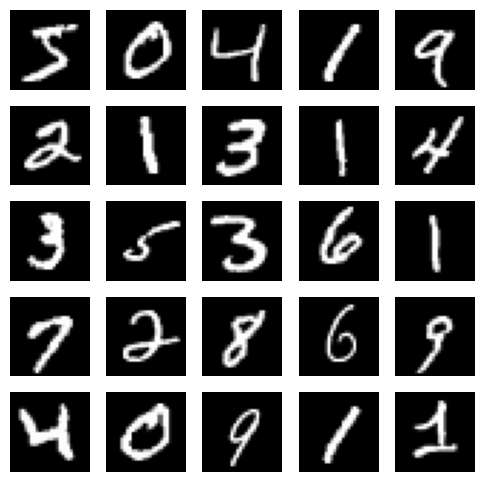

In [5]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

### 데이터 전처리

In [23]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩 (One-Hot Encoding)
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

### 모델 설계

In [25]:
model = tf.keras.Sequential()

In [27]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #28*28크기 2차원 이미지를 784개 1차원 벡터로 변환
model.add(tf.keras.layers.Dense(100, activation='relu')) #100개는 하이퍼파라미터로 임의로 설정
model.add(tf.keras.layers.Dense(10, activation='softmax')) #출력층은 정답의 갯수랑 동일한 10개로 지정

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy', #정답을 원핫인코딩방식으로 나타냈기 때문에 loss는 categorical_crossentropy로설정
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)
#traing data로부터 30%비율로 validation data 생성후 overfitting 확인

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.8505 - loss: 0.5202 - val_accuracy: 0.9469 - val_loss: 0.1836
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.9547 - loss: 0.1569 - val_accuracy: 0.9594 - val_loss: 0.1384
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9696 - loss: 0.1031 - val_accuracy: 0.9636 - val_loss: 0.1205
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.9793 - loss: 0.0720 - val_accuracy: 0.9682 - val_loss: 0.1100
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9825 - loss: 0.0581 - val_accuracy: 0.9703 - val_loss: 0.1008
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.9875 - loss: 0.0425 - val_accuracy: 0.9698 - val_loss: 0.1027
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.9893 - loss: 0.0357 - val_accuracy: 0.9699 - val_loss: 0.1047
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.9920 -

### 모델 정확도 평가

In [33]:
model.evaluate(x_test,t_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.9692 - loss: 0.1722


[0.14689603447914124, 0.9728999733924866]

### 손실 및 정확도 

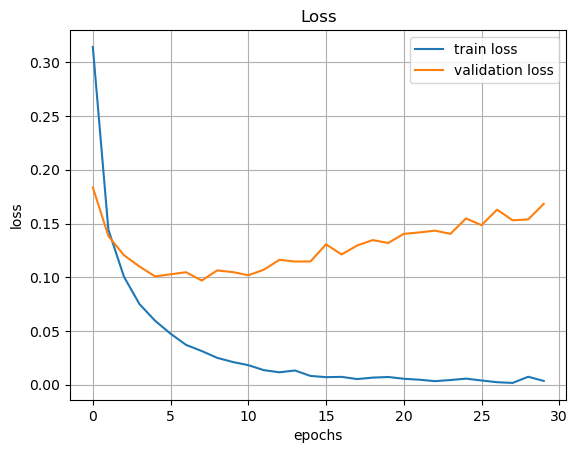

In [36]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

#손실함수는 지속적으로 감소

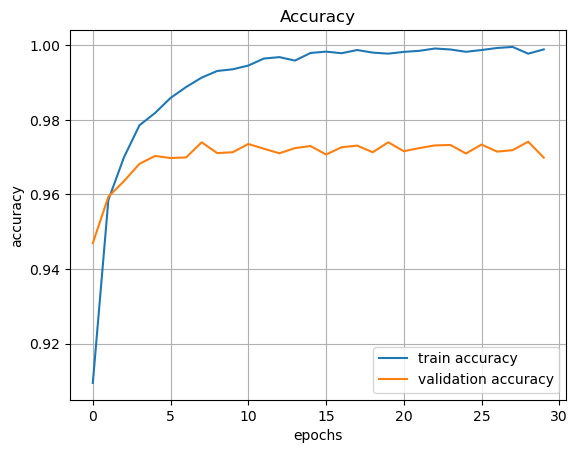

In [38]:
#정확도는 지속적으로 증가하는 모양을 볼 수 있음
#아래 그래프에서 0.96%부터 오버피팅이 발생하는 것을 볼 수 있음.
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [ ]:
# 혼동행렬


from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test) #테스트 입력 데이터에 대한 prediction

cm = confusion_matrix(np.argmax(t_test, axis=-1), #테스트 데이터 정답
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()
     